In [230]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'lung_cancer_prediction.csv'  
data = pd.read_csv(file_path);

In [231]:
# Load the CSV file into a DataFrame
df = pd.read_csv('lung_cancer_prediction.csv')

# Display the first 5 rows of the DataFrame
print(df.head());

    Country  Age  Gender Smoking_Status Second_Hand_Smoke  \
0    Russia   82    Male  Former Smoker               Yes   
1  Thailand   66  Female  Former Smoker                No   
2  Colombia   87    Male  Former Smoker                No   
3     Egypt   51  Female  Former Smoker                No   
4  DR Congo   43    Male  Former Smoker                No   

  Air_Pollution_Exposure Occupation_Exposure Rural_or_Urban  \
0                 Medium                  No          Urban   
1                   High                  No          Rural   
2                 Medium                  No          Urban   
3                    Low                 Yes          Rural   
4                   High                  No          Urban   

  Socioeconomic_Status Healthcare_Access  ... Treatment_Access  \
0                 High           Limited  ...          Partial   
1               Middle              Good  ...          Partial   
2                  Low              Poor  ...          P

In [232]:
print (df.shape);

(460292, 25)


In [233]:
# Get summary statistics for numerical columns
print(df.describe())

                 Age  Mortality_Risk  5_Year_Survival_Probability
count  460292.000000   460292.000000                460292.000000
mean       60.044183        0.500113                     0.499866
std        17.590029        0.259828                     0.260258
min        30.000000        0.050002                     0.050001
25%        45.000000        0.274948                     0.274252
50%        60.000000        0.500361                     0.499002
75%        75.000000        0.725412                     0.726071
max        90.000000        0.949997                     0.949998


In [234]:
print (df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
460287    False
460288    False
460289    False
460290    False
460291    False
Length: 460292, dtype: bool


In [235]:
# Check for missing values in the entire DataFrame
df.isnull().sum().sum()

184226

In [236]:
# Drop rows with any missing values
df.dropna();

#Exploratory Data Analysis (EDA)
#Demographics and Risk Factors

In [238]:
#What is the distribution of ages in the dataset?
df['Age'].describe();

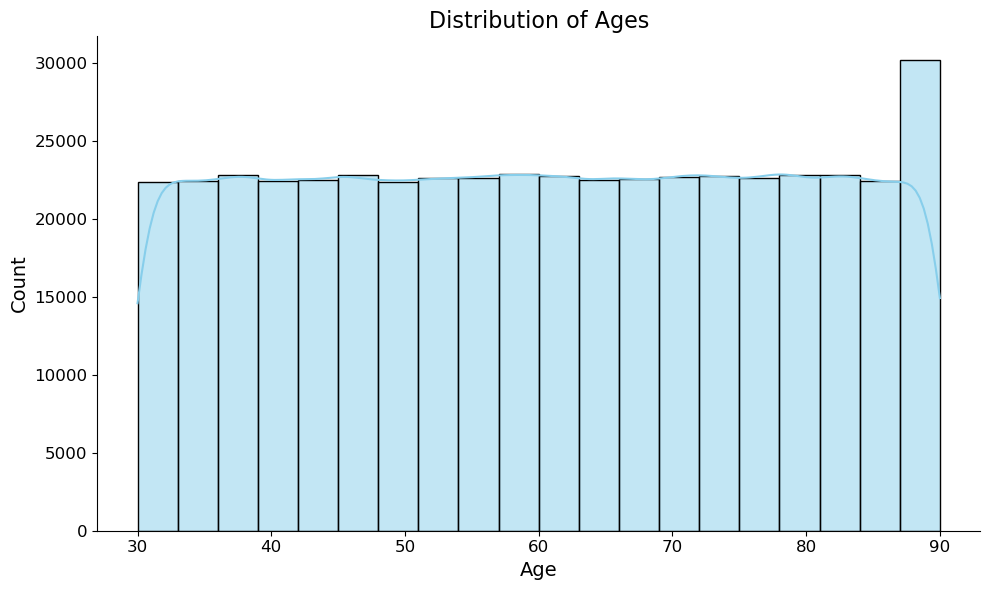

In [239]:
import pandas as pd  # If your data is in a Pandas DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))  # Adjust figure size for better proportions

sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black') # Adjust bins!

plt.title('Distribution of Ages', fontsize=16)  # Informative and larger title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Increase tick label size for readability
plt.yticks(fontsize=12)
sns.despine()  # Optional: Removes spines (borders) for a cleaner look

plt.tight_layout() # Adjusts subplot params so that subplots fit in to the figure area.
plt.show();

In [240]:
#Comparing Age with Lung Cancer Diagnosis
df.groupby('Final_Prediction')['Age'].mean();

In [241]:
#Comparing Age with Lung Cancer Diagnosis
df.groupby('Final_Prediction')['Age'].mean();

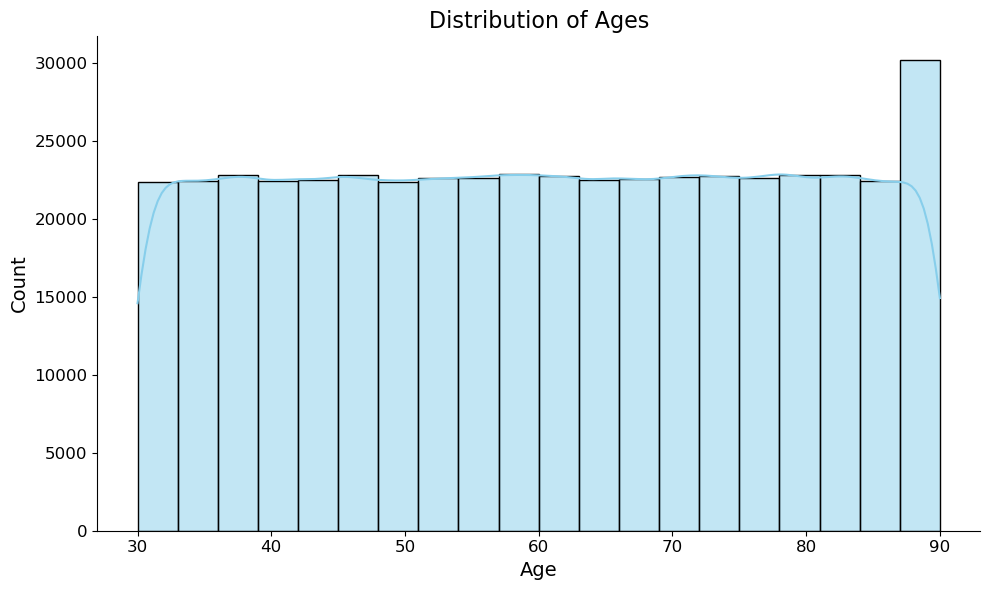

In [242]:
import pandas as pd  # If your data is in a Pandas DataFrame
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))  # Adjust figure size for better proportions

sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black') # Adjust bins!

plt.title('Distribution of Ages', fontsize=16)  # Informative and larger title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Increase tick label size for readability
plt.yticks(fontsize=12)
sns.despine()  # Optional: Removes spines (borders) for a cleaner look

plt.tight_layout() # Adjusts subplot params so that subplots fit in to the figure area.
plt.show();

In [243]:
df['Age'].skew()

-0.0027255899638361073

In [244]:
print(df['Final_Prediction'].isnull().sum())  # Check missing values in 'Final_Prediction'
print(df['Age'].isnull().sum())  # Check missing values in 'Age'

0
0


In [343]:
#What percentage of patients are smokers, non-smokers, and former smokers?
df.groupby('Final_Prediction')['Age'].mean();

In [345]:
#What percentage of patients are smokers, non-smokers, and former smokers?
smoking_percentage = df['Smoking_Status'].value_counts(normalize=True) * 100
print(smoking_percentage)

Smoking_Status
Smoker           33.403579
Non-Smoker       33.357304
Former Smoker    33.239118
Name: proportion, dtype: float64


In [349]:
#standard deviation to be sure its equal
df['Smoking_Status'].value_counts(normalize=True).std()

0.0008481020882713148

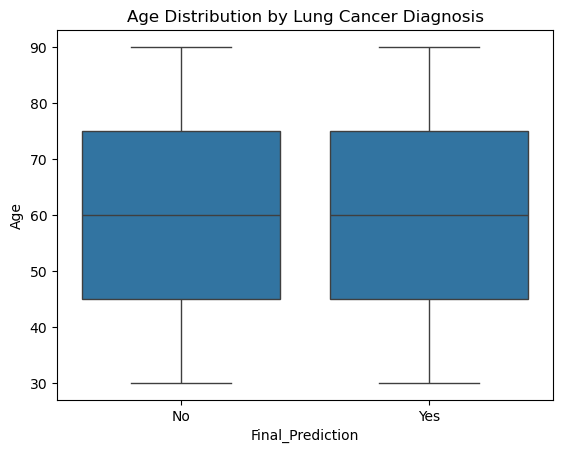

In [246]:
sns.boxplot(x='Final_Prediction', y='Age', data=df)
plt.title("Age Distribution by Lung Cancer Diagnosis")
plt.show();

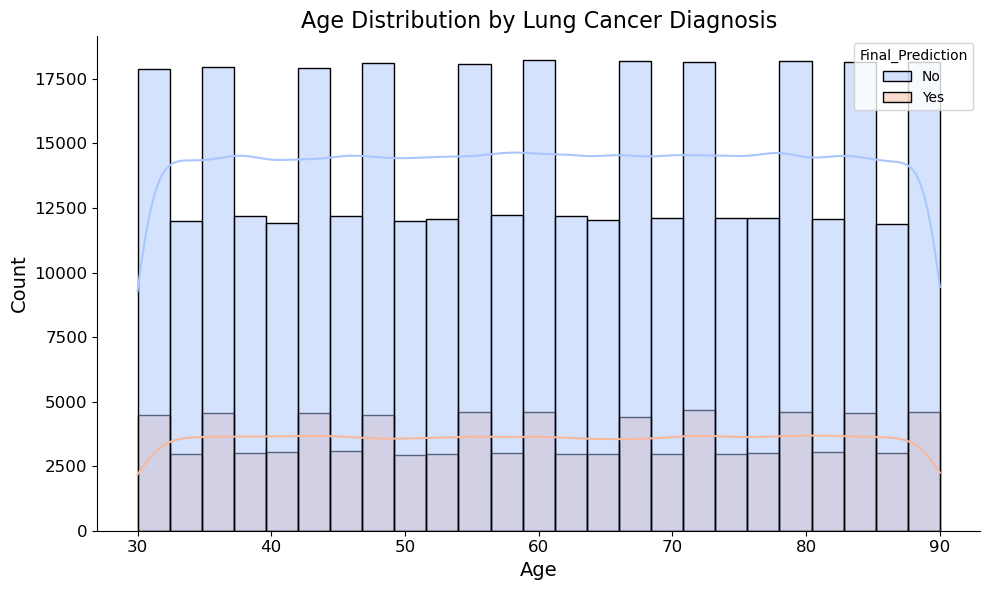

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
sns.histplot(df, x='Age', hue='Final_Prediction', kde=True, bins=25, palette='coolwarm', edgecolor='black')  # Added color palette and increased bins
plt.title('Age Distribution by Lung Cancer Diagnosis', fontsize=16)  # Clear and descriptive title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Increase tick label size for readability
plt.yticks(fontsize=12)
sns.despine()  # Removes spines (borders) for a cleaner look
plt.tight_layout()  # Adjusts layout for better spacing
plt.show()  # Display the plot


In [248]:
# What percentage of patients are smokers, non-smokers, and former smokers?
# Count unique values in the 'Smoking_Status' column and convert counts to percentages
smoking_percentage = df['Smoking_Status'].value_counts(normalize=True) * 100

# Display the result
print(smoking_percentage)


Smoking_Status
Smoker           33.403579
Non-Smoker       33.357304
Former Smoker    33.239118
Name: proportion, dtype: float64


In [249]:
#correlation between smoking status and lung cancer diagnosis?
df_sample = df.sample(10000)  # Get a random sample of 10,000 rows for testing
print(pd.crosstab(df_sample['Smoking_Status'], df_sample['Final_Prediction']));

Final_Prediction    No  Yes
Smoking_Status             
Former Smoker     2672  675
Non-Smoker        2680  670
Smoker            2620  683


In [351]:
#check stat significance for correlation between smoking status and lung cancer diagnosis?
import scipy.stats as stats
import pandas as pd

# Create the contingency table
contingency_table = pd.crosstab(df['Smoking_Status'], df['Final_Prediction'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared test statistic: {chi2_stat}")
print(f"p-value: {p_value}")

# Check significance
if p_value < 0.05:
    print("There is a statistically significant relationship between Smoking Status and Lung Cancer Diagnosis.")
else:
    print("No significant relationship found between Smoking Status and Lung Cancer Diagnosis.")


Chi-squared test statistic: 0.5315233599623372
p-value: 0.7666218070555512
No significant relationship found between Smoking Status and Lung Cancer Diagnosis.


In [250]:
df_sample = df[df['Smoking_Status'] == 'Smoker']  # Work with a smaller subset (just smokers)
print(pd.crosstab(df_sample['Smoking_Status'], df_sample['Final_Prediction']))

Final_Prediction      No    Yes
Smoking_Status                 
Smoker            122997  30757


In [251]:
# How many patients live in rural vs. urban areas?
Rural_or_Urban_percentage = df['Rural_or_Urban'].value_counts(normalize=True) * 100
print(Rural_or_Urban_percentage);

Rural_or_Urban
Urban    69.996437
Rural    30.003563
Name: proportion, dtype: float64


In [252]:
#How does air pollution exposure vary across different socioeconomic statuses?
# Group by 'Socioeconomic_Status' and get counts of 'Air_Pollution_Exposure' for each group
pollution_by_socioeco = df.groupby('Socioeconomic_Status')['Air_Pollution_Exposure'].value_counts()
print(pollution_by_socioeco);

Socioeconomic_Status  Air_Pollution_Exposure
High                  Low                       37034
                      Medium                    36708
                      High                      18371
Low                   Low                       55405
                      Medium                    54940
                      High                      27613
Middle                Medium                    92417
                      Low                       92139
                      High                      45665
Name: count, dtype: int64


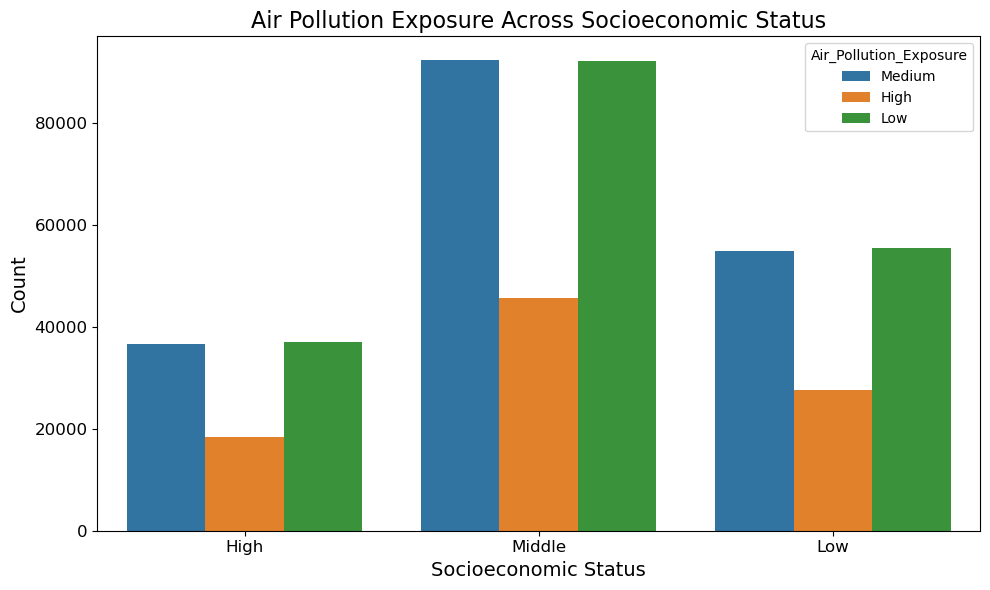

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot to visualize air pollution exposure across socioeconomic status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Socioeconomic_Status', hue='Air_Pollution_Exposure')

# Add titles and labels
plt.title('Air Pollution Exposure Across Socioeconomic Status', fontsize=16)
plt.xlabel('Socioeconomic Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)  # Increase tick label size for readability
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show();

Healthcare Accessibility and Cancer Diagnosis

In [255]:
#What is the distribution of patients across different healthcare access levels?
healthcare_access_distribution = df['Healthcare_Access'].value_counts()
print(healthcare_access_distribution);


Healthcare_Access
Good       230227
Limited    137789
Poor        92276
Name: count, dtype: int64


/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/528548457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Healthcare_Access', hue=None, palette='pastel')


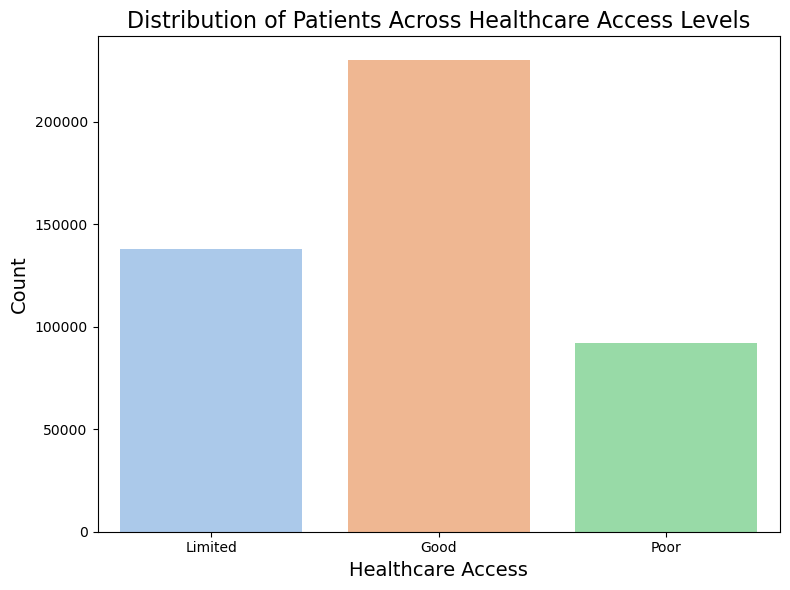

In [256]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Healthcare_Access', hue=None, palette='pastel')
plt.title('Distribution of Patients Across Healthcare Access Levels', fontsize=16)
plt.xlabel('Healthcare Access', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show();

In [257]:
# How does insurance coverage affect lung cancer diagnosis stages?
print(df.groupby('Insurance_Coverage')['Stage_at_Diagnosis'].value_counts());

Insurance_Coverage  Stage_at_Diagnosis
No                  III                   41200
                    II                    41153
                    IV                    27619
                    I                     27467
Yes                 II                    97197
                    III                   96683
                    I                     64687
                    IV                    64286
Name: count, dtype: int64


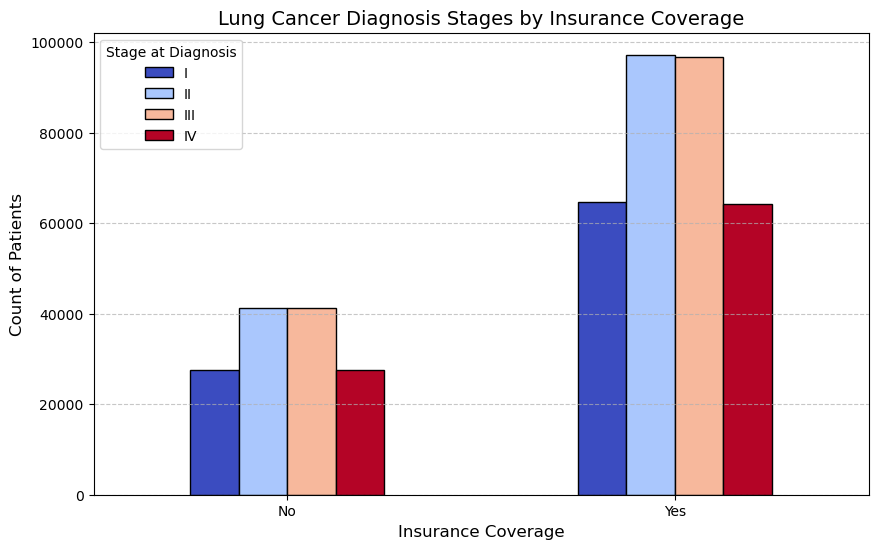

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a frequency table
stage_counts = pd.crosstab(df['Insurance_Coverage'], df['Stage_at_Diagnosis'])

# Plot the grouped bar chart
stage_counts.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', edgecolor='black')

plt.title('Lung Cancer Diagnosis Stages by Insurance Coverage', fontsize=14)
plt.xlabel('Insurance Coverage', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Stage at Diagnosis')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

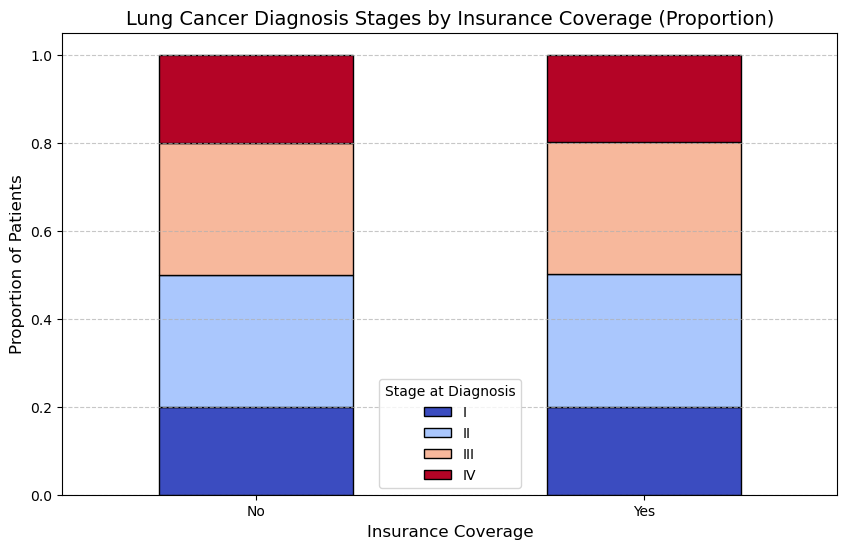

In [259]:
stage_counts_norm = stage_counts.div(stage_counts.sum(axis=1), axis=0)  # Convert to percentages

stage_counts_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', edgecolor='black')

plt.title('Lung Cancer Diagnosis Stages by Insurance Coverage (Proportion)', fontsize=14)
plt.xlabel('Insurance Coverage', fontsize=12)
plt.ylabel('Proportion of Patients', fontsize=12)
plt.legend(title='Stage at Diagnosis')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

In [260]:
print(df.groupby('Delay_in_Diagnosis')['Final_Prediction'].value_counts());

Delay_in_Diagnosis  Final_Prediction
No                  No                  257469
                    Yes                  64529
Yes                 No                  110638
                    Yes                  27656
Name: count, dtype: int64


In [261]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Delay_in_Diagnosis'], df['Final_Prediction'])

# Apply Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared test statistic: {chi2}")
print(f"p-value: {p}")

Chi-squared test statistic: 0.10500540254835672
p-value: 0.7459036846707296


In [262]:
#Do patients with good healthcare access have lower mortality risk and higher survival 
print(df.groupby('Healthcare_Access')[['Mortality_Risk', '5_Year_Survival_Probability']].mean());


                   Mortality_Risk  5_Year_Survival_Probability
Healthcare_Access                                             
Good                     0.500689                     0.500198
Limited                  0.499956                     0.499145
Poor                     0.498909                     0.500116


/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/3855066488.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Healthcare_Access', y='Mortality_Risk', palette='pastel')


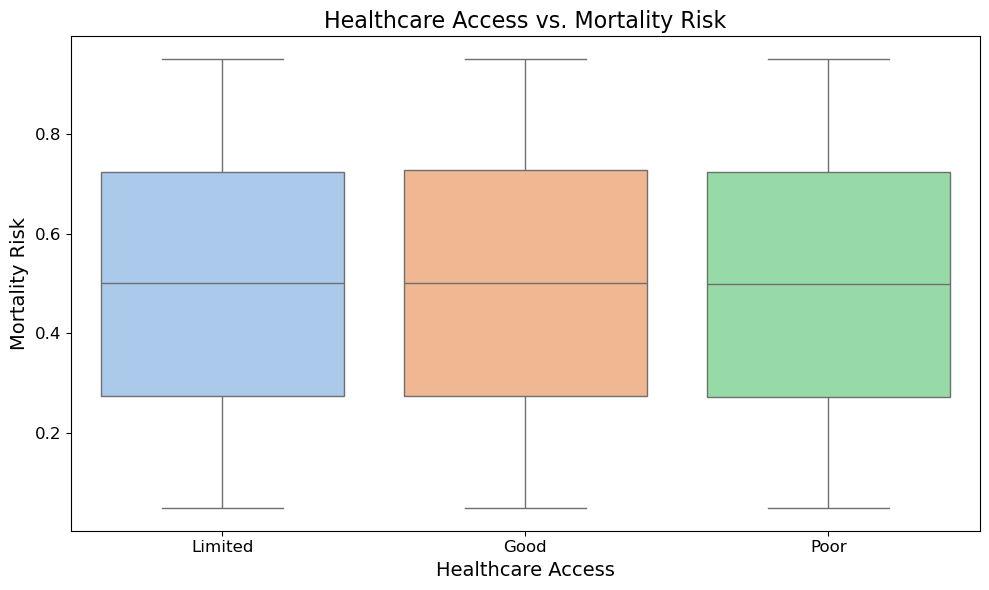

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Healthcare_Access and calculate the mean of Mortality_Risk for each group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Healthcare_Access', y='Mortality_Risk', palette='pastel')

# Add titles and labels
plt.title('Healthcare Access vs. Mortality Risk', fontsize=16)
plt.xlabel('Healthcare Access', fontsize=14)
plt.ylabel('Mortality Risk', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show();

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/1863707511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Healthcare_Access', y='5_Year_Survival_Probability', palette='pastel')


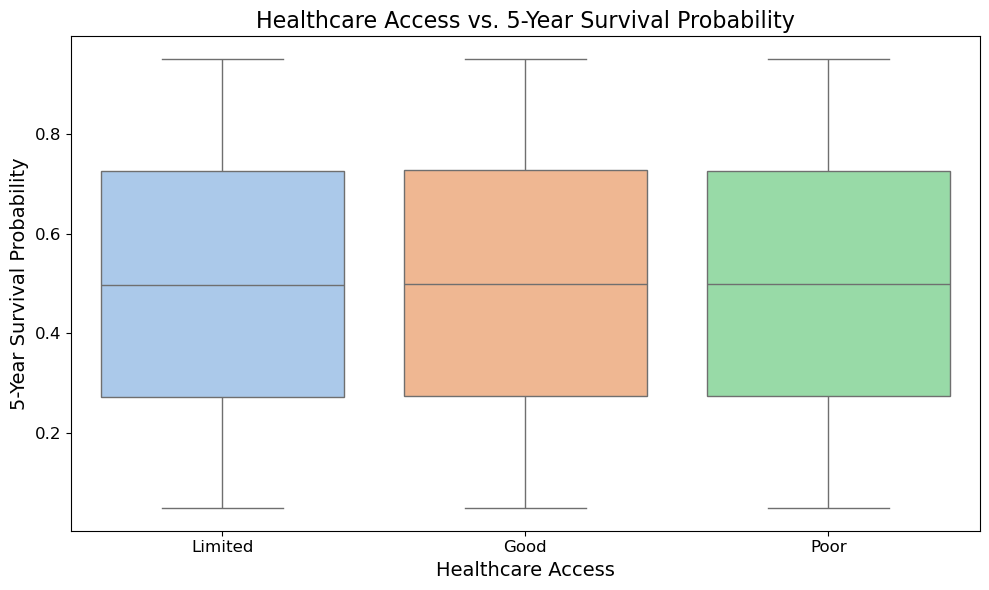

In [264]:
# Group by Healthcare_Access and calculate the mean of 5_Year_Survival_Probability for each group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Healthcare_Access', y='5_Year_Survival_Probability', palette='pastel')

# Add titles and labels
plt.title('Healthcare Access vs. 5-Year Survival Probability', fontsize=16)
plt.xlabel('Healthcare Access', fontsize=14)
plt.ylabel('5-Year Survival Probability', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [265]:
#*Distribution of Patients by Country
df['Country'].value_counts()

Country
Japan           15738
South Africa    15642
South Korea     15530
DR Congo        15521
Thailand        15500
Myanmar         15457
Brazil          15441
Nigeria         15413
Turkey          15394
Mexico          15387
Indonesia       15351
France          15347
USA             15347
Vietnam         15344
UK              15330
Egypt           15306
Bangladesh      15301
China           15294
India           15286
Spain           15272
Tanzania        15268
Iran            15264
Ethiopia        15263
Pakistan        15261
Germany         15253
Colombia        15193
Italy           15188
Russia          15175
Kenya           15134
Philippines     15092
Name: count, dtype: int64

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/3358485088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', palette='pastel')


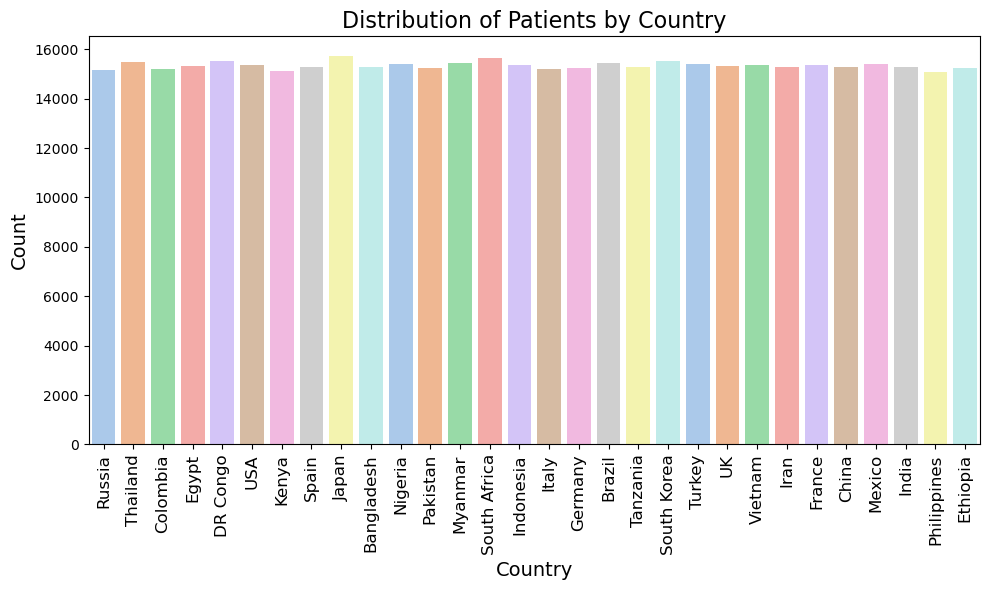

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of patients by country
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', palette='pastel')

# Add titles and labels
plt.title('Distribution of Patients by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate labels for better readability
plt.tight_layout()
plt.show();

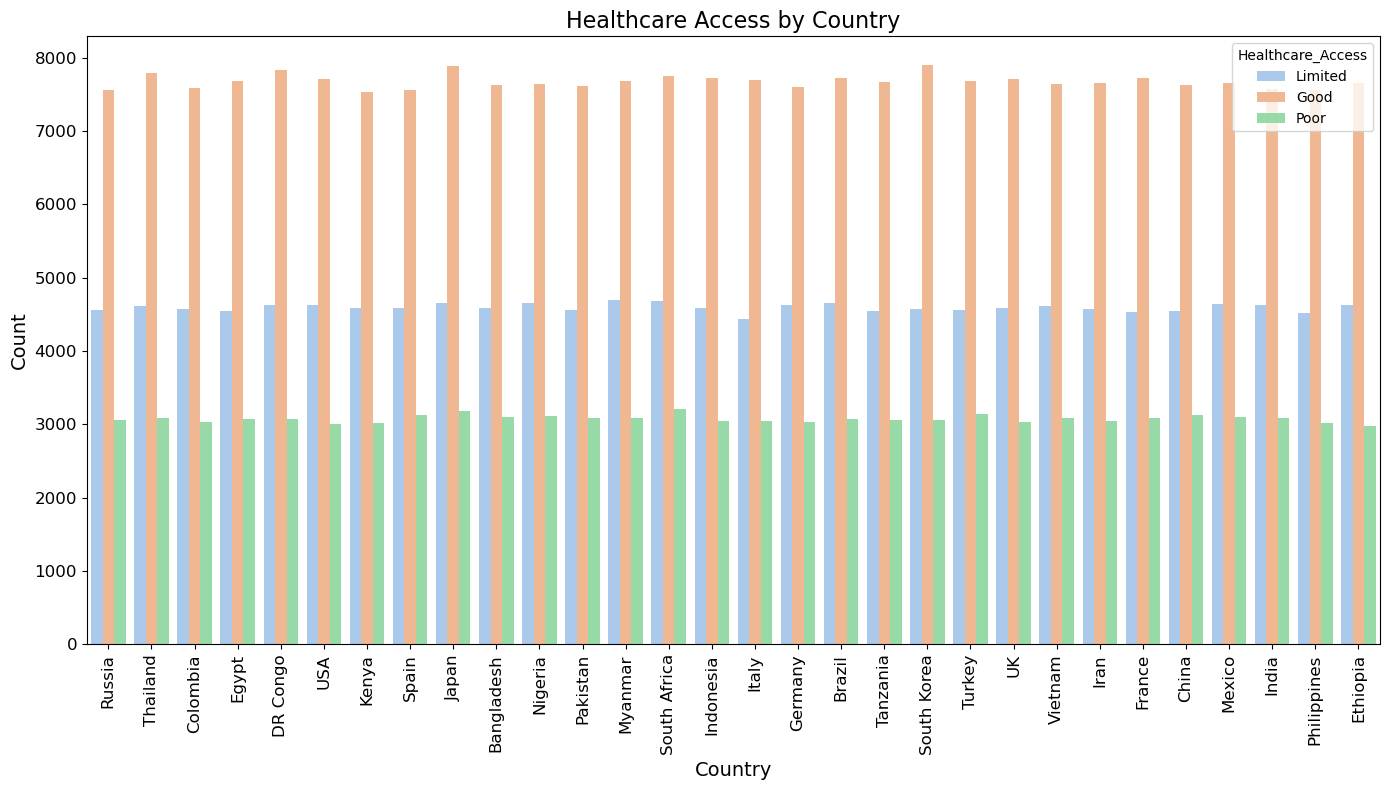

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='Healthcare_Access', palette='pastel')

plt.title('Healthcare Access by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [268]:
#Healthcare Access by Country
# Group by 'Country' and 'Healthcare_Access', then count the occurrences
grouped_data = df.groupby('Country')['Healthcare_Access'].value_counts()

# Print the grouped data
print(grouped_data)


Country     Healthcare_Access
Bangladesh  Good                 7625
            Limited              4580
            Poor                 3096
Brazil      Good                 7719
            Limited              4650
                                 ... 
USA         Limited              4623
            Poor                 3012
Vietnam     Good                 7644
            Limited              4612
            Poor                 3088
Name: count, Length: 90, dtype: int64


In [269]:
#Healthcare Access by Country
# Group by 'Country' and 'Healthcare_Access', then count the occurrences
grouped_data = df.groupby('Country')['Healthcare_Access'].value_counts()

# Print the grouped data
print(grouped_data)


Country     Healthcare_Access
Bangladesh  Good                 7625
            Limited              4580
            Poor                 3096
Brazil      Good                 7719
            Limited              4650
                                 ... 
USA         Limited              4623
            Poor                 3012
Vietnam     Good                 7644
            Limited              4612
            Poor                 3088
Name: count, Length: 90, dtype: int64


In [270]:
# Count the number of lung cancer diagnoses per country
diagnosis_counts = df.groupby(['Country', 'Final_Prediction']).size().unstack()

# Print the counts
print(diagnosis_counts)


Final_Prediction     No   Yes
Country                      
Bangladesh        12289  3012
Brazil            12421  3020
China             12218  3076
Colombia          12199  2994
DR Congo          12402  3119
Egypt             12282  3024
Ethiopia          12127  3136
France            12304  3043
Germany           12221  3032
India             12167  3119
Indonesia         12370  2981
Iran              12171  3093
Italy             12208  2980
Japan             12516  3222
Kenya             12124  3010
Mexico            12326  3061
Myanmar           12275  3182
Nigeria           12416  2997
Pakistan          12211  3050
Philippines       12131  2961
Russia            12120  3055
South Africa      12387  3255
South Korea       12274  3256
Spain             12262  3010
Tanzania          12279  2989
Thailand          12312  3188
Turkey            12302  3092
UK                12301  3029
USA               12222  3125
Vietnam           12270  3074


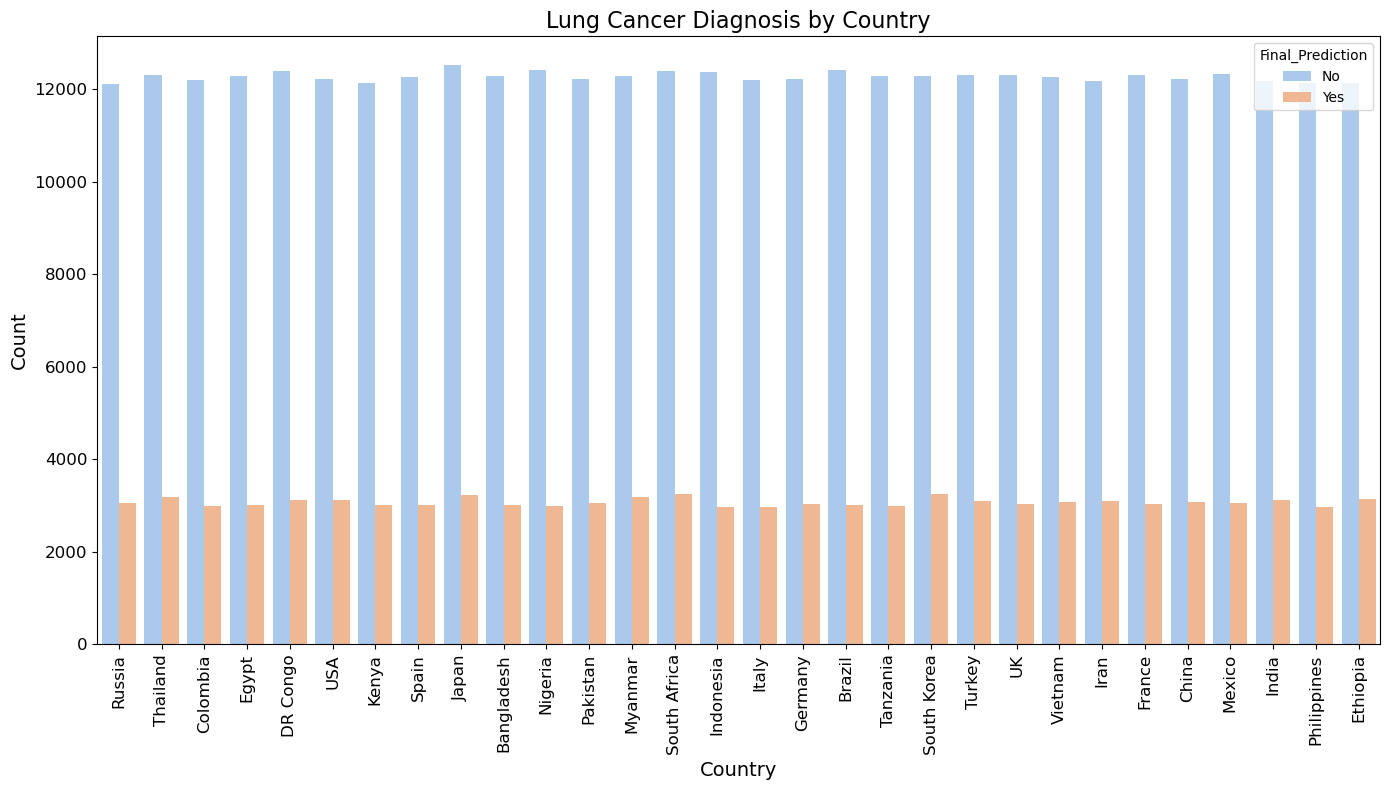

In [271]:
#Lung Cancer Diagnosis by Country
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot to visualize Lung Cancer Diagnosis by Country
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='Final_Prediction', palette='pastel')

# Titles and labels
plt.title('Lung Cancer Diagnosis by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate country names for better readability
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [272]:
#Mortality Risk and 5-Year Survival by Country
# Group by country and calculate the mean for Mortality Risk and 5-Year Survival
country_stats = df.groupby('Country')[['Mortality_Risk', '5_Year_Survival_Probability']].mean()

# Print the summary statistics for the grouped data
print(country_stats);

              Mortality_Risk  5_Year_Survival_Probability
Country                                                  
Bangladesh          0.500645                     0.497801
Brazil              0.499945                     0.498029
China               0.501240                     0.499621
Colombia            0.502960                     0.503689
DR Congo            0.498760                     0.501565
Egypt               0.500552                     0.500875
Ethiopia            0.500889                     0.502796
France              0.501891                     0.498340
Germany             0.500222                     0.501215
India               0.496490                     0.496758
Indonesia           0.500423                     0.498890
Iran                0.499597                     0.500029
Italy               0.500154                     0.496311
Japan               0.499710                     0.499571
Kenya               0.501224                     0.499063
Mexico        

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/3973857497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Mortality_Risk', data=df, palette='Set2')
/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/3973857497.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='5_Year_Survival_Probability', data=df, palette='Set1')


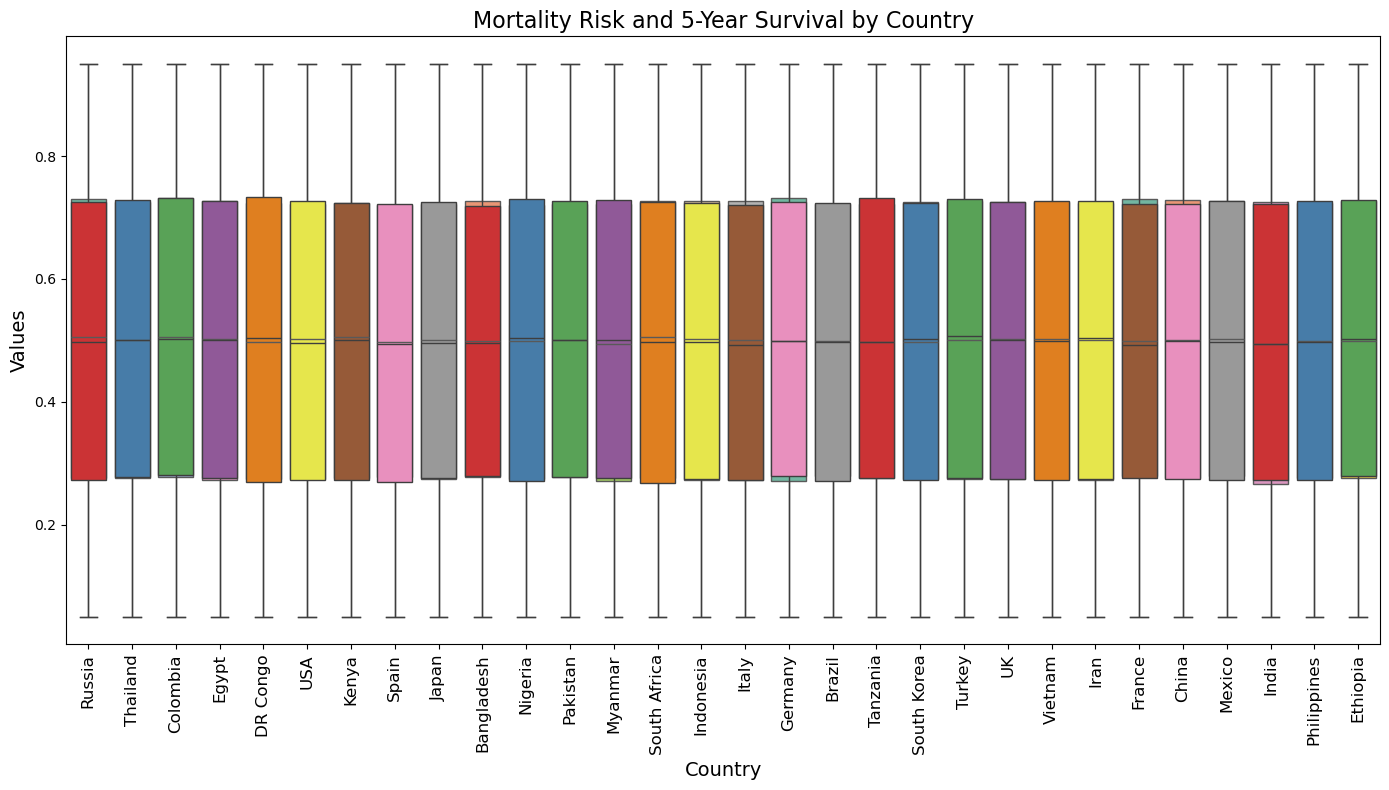

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot Mortality Risk by Country
sns.boxplot(x='Country', y='Mortality_Risk', data=df, palette='Set2')

# Plot 5-Year Survival by Country
sns.boxplot(x='Country', y='5_Year_Survival_Probability', data=df, palette='Set1')

# Titles and labels
plt.title('Mortality Risk and 5-Year Survival by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/3923915620.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Mortality_Risk', data=top_5_df, palette='Set2')
/var/folders/zq/x_0wkcmd233dz7xwhqmh41400000gn/T/ipykernel_1903/3923915620.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='5_Year_Survival_Probability', data=top_5_df, palette='Set1')


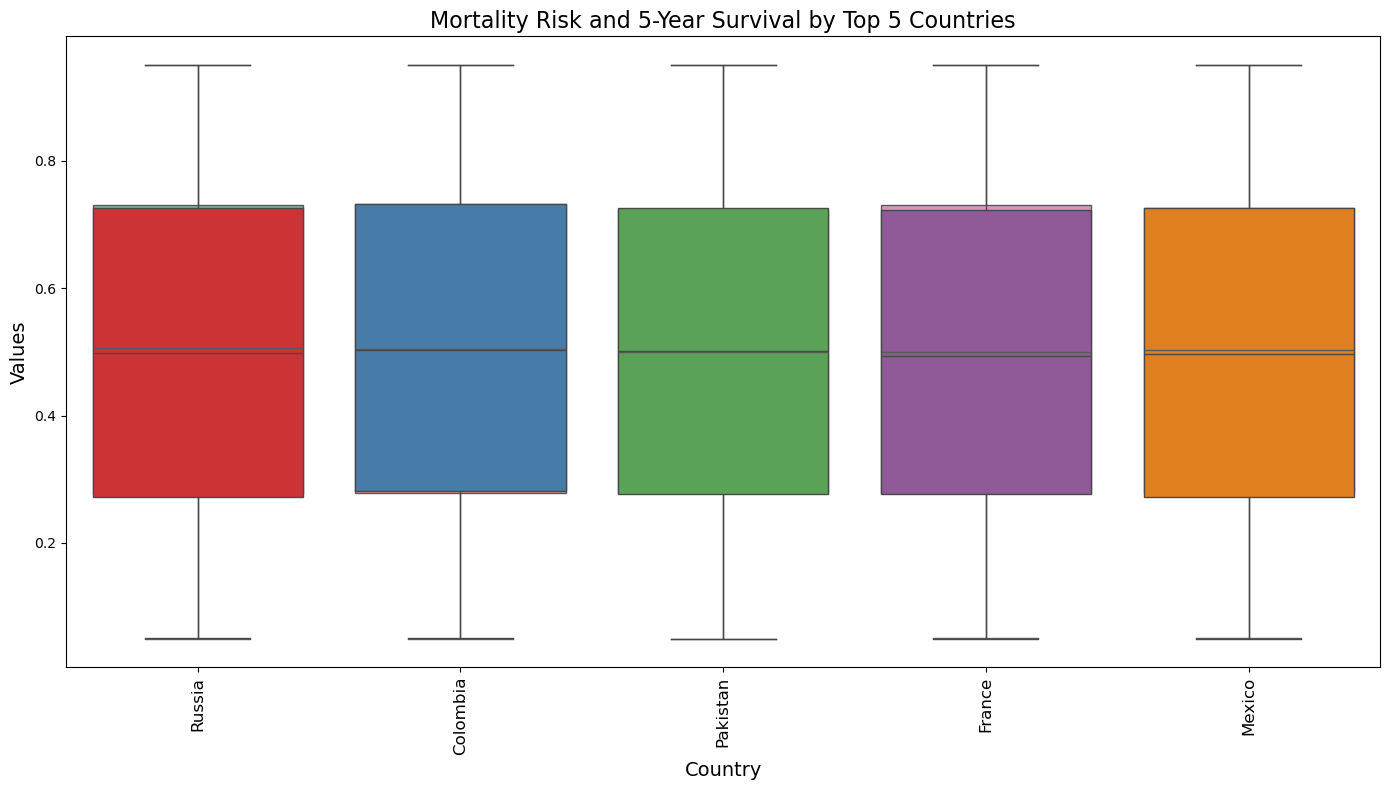

In [274]:
# Calculate the mean of Mortality Risk and 5-Year Survival Probability for each country
country_stats = df.groupby('Country')[['Mortality_Risk', '5_Year_Survival_Probability']].mean()

# Sort countries by Mortality Risk (or you can sort by 5_Year_Survival_Probability)
top_5_countries = country_stats.sort_values('Mortality_Risk', ascending=False).head(5).index

# Filter the original dataset to include only the top 5 countries
top_5_df = df[df['Country'].isin(top_5_countries)]

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot Mortality Risk by Country for the top 5 countries
sns.boxplot(x='Country', y='Mortality_Risk', data=top_5_df, palette='Set2')

# Plot 5-Year Survival by Country for the top 5 countries
sns.boxplot(x='Country', y='5_Year_Survival_Probability', data=top_5_df, palette='Set1')

# Titles and labels
plt.title('Mortality Risk and 5-Year Survival by Top 5 Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


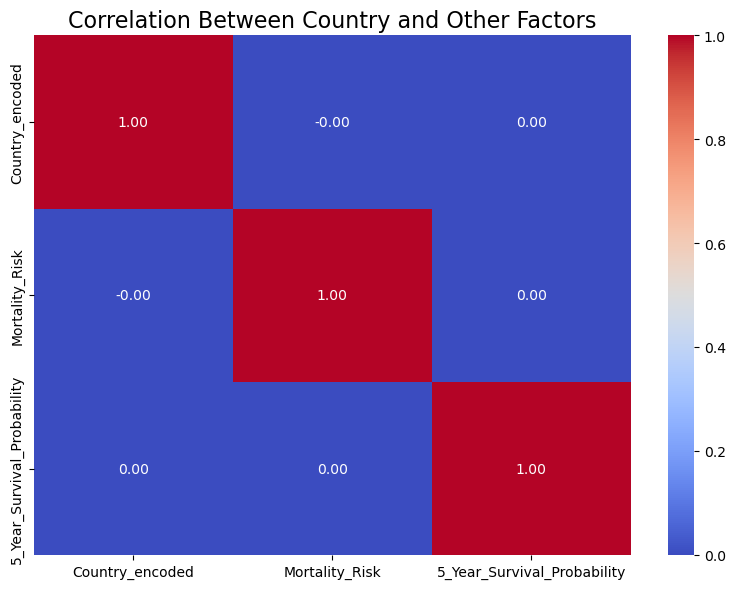

In [275]:
#Correlation Between Country and Other Factors
import seaborn as sns
import matplotlib.pyplot as plt

# If 'Country' is categorical, you might want to encode it numerically before calculating correlation
df['Country_encoded'] = df['Country'].astype('category').cat.codes  # Encode the country as numeric values

# Select numerical columns you want to analyze
numerical_columns = ['Mortality_Risk', '5_Year_Survival_Probability']

# Calculate the correlation matrix
correlation_matrix = df[['Country_encoded'] + numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Between Country and Other Factors', fontsize=16)
plt.tight_layout()
plt.show()


              Mortality_Risk  5_Year_Survival_Probability
Country                                                  
Bangladesh          0.500645                     0.497801
Brazil              0.499945                     0.498029
China               0.501240                     0.499621
Colombia            0.502960                     0.503689
DR Congo            0.498760                     0.501565
Egypt               0.500552                     0.500875
Ethiopia            0.500889                     0.502796
France              0.501891                     0.498340
Germany             0.500222                     0.501215
India               0.496490                     0.496758
Indonesia           0.500423                     0.498890
Iran                0.499597                     0.500029
Italy               0.500154                     0.496311
Japan               0.499710                     0.499571
Kenya               0.501224                     0.499063
Mexico        

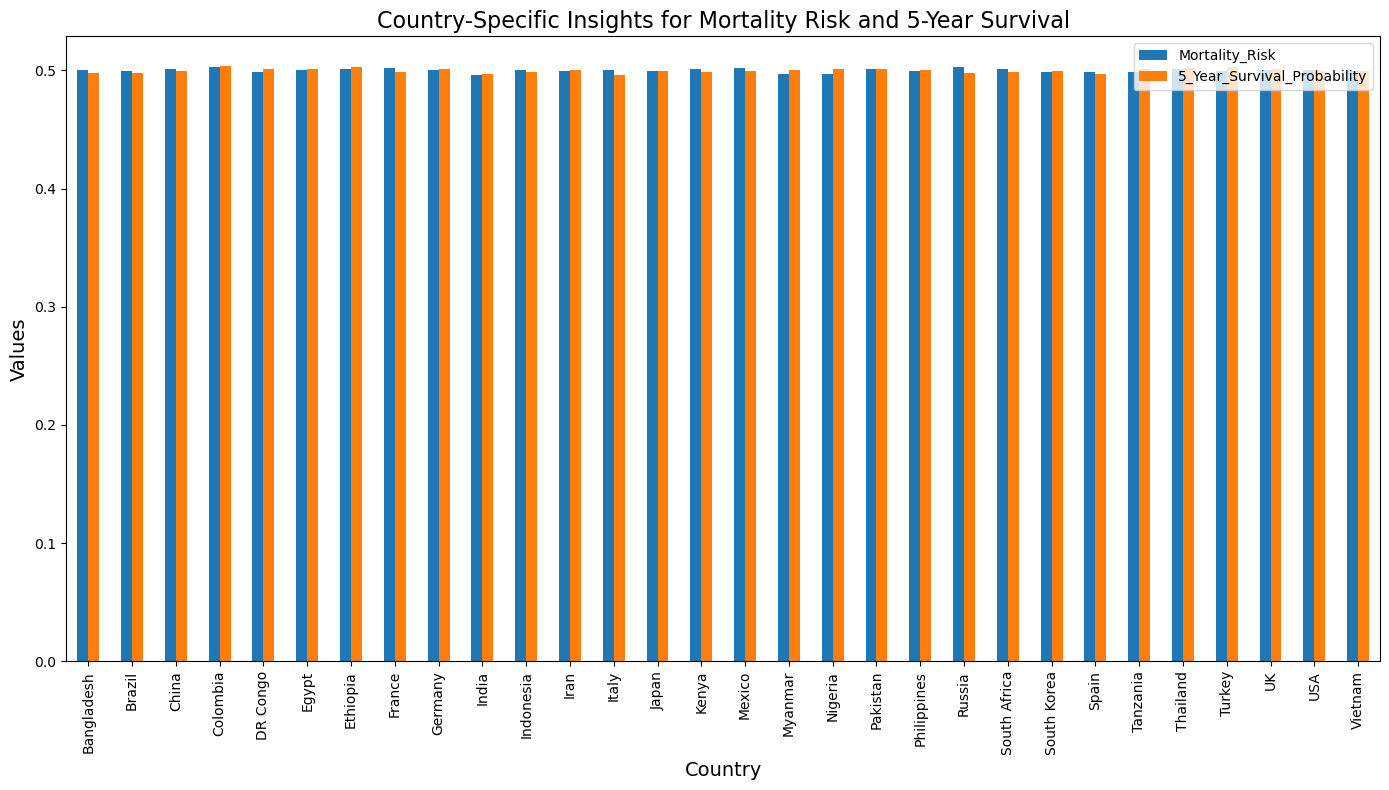

In [276]:
#Country-Specific Insights
# Group by Country and calculate mean for each numerical feature
country_grouped = df.groupby('Country')[numerical_columns].mean()

# Display the grouped results
print(country_grouped)

# Visualize the results
country_grouped.plot(kind='bar', figsize=(14, 8))
plt.title('Country-Specific Insights for Mortality Risk and 5-Year Survival', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.tight_layout()
plt.show()


Environmental and Occupational Risk Factors

In [278]:
#What percentage of lung cancer patients were exposed to secondhand smoke?
# Group by Final_Prediction (Lung Cancer Yes/No) and check Second_Hand_Smoke exposure
lung_cancer_smoke_percentage = df[df['Final_Prediction'] == 'Yes']['Second_Hand_Smoke'].value_counts(normalize=True) * 100

# Print out the percentage
print(lung_cancer_smoke_percentage)


Second_Hand_Smoke
No     70.073222
Yes    29.926778
Name: proportion, dtype: float64


In [353]:
# Perform the chi-squared test for second hand smoke and lung cancer diagnosis
from scipy.stats import chi2_contingency

# Create a crosstab for second hand smoke and lung cancer diagnosis
crosstab = pd.crosstab(df['Second_Hand_Smoke'], df['Final_Prediction'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(crosstab)

# Print results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# If p-value is below 0.05, it indicates a significant association

Chi-squared statistic: 0.5312538542341456
P-value: 0.46608018968998177


In [279]:
# How does occupation exposure correlate with lung cancer diagnosis
occupation_lung_cancer = df.groupby('Occupation_Exposure')['Final_Prediction'].value_counts(normalize=True) * 100
print(occupation_lung_cancer);

Occupation_Exposure  Final_Prediction
No                   No                  79.968655
                     Yes                 20.031345
Yes                  No                  79.984014
                     Yes                 20.015986
Name: proportion, dtype: float64


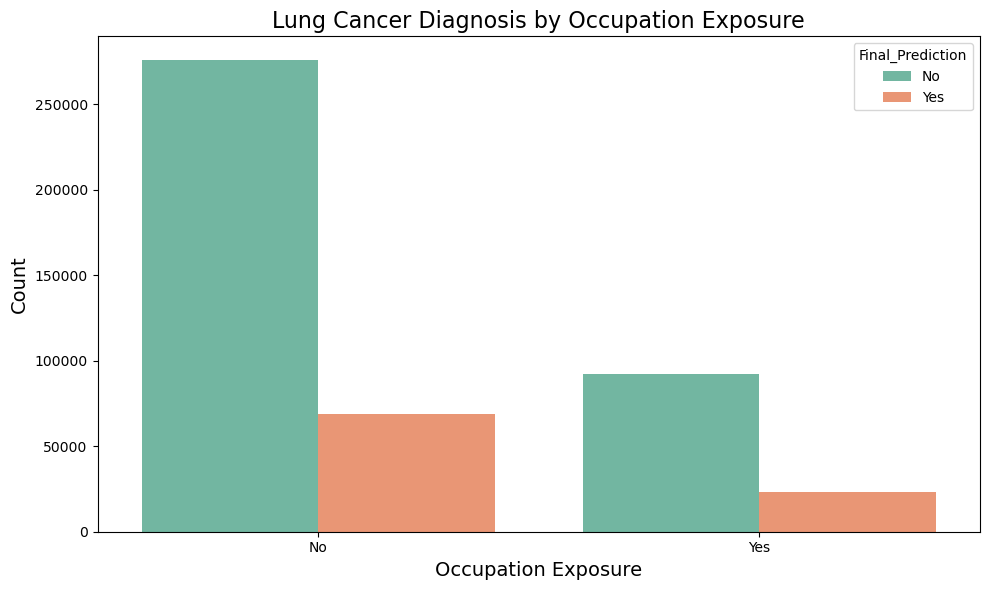

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation_Exposure', hue='Final_Prediction', palette='Set2')
plt.title('Lung Cancer Diagnosis by Occupation Exposure', fontsize=16)
plt.xlabel('Occupation Exposure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


In [281]:
#Is there a relationship between air pollution exposure and cancer type (NSCLC vs. SCLC)?
# Group by air pollution exposure and cancer type
pollution_cancer_type = df.groupby('Air_Pollution_Exposure')['Cancer_Type'].value_counts(normalize=True) * 100
print(pollution_cancer_type)


Air_Pollution_Exposure  Cancer_Type
High                    NSCLC          84.992744
                        SCLC           15.007256
Low                     NSCLC          84.912070
                        SCLC           15.087930
Medium                  NSCLC          84.945536
                        SCLC           15.054464
Name: proportion, dtype: float64


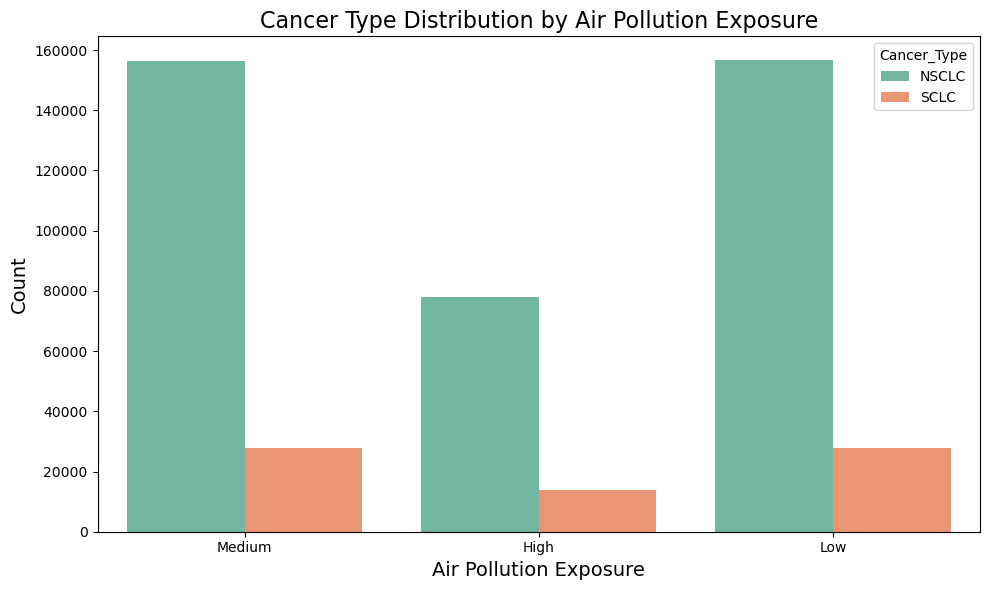

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Air_Pollution_Exposure', hue='Cancer_Type', palette='Set2')
plt.title('Cancer Type Distribution by Air Pollution Exposure', fontsize=16)
plt.xlabel('Air Pollution Exposure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()


In [283]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Air_Pollution_Exposure'], df['Cancer_Type'])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-squared test statistic: 0.3154854334051569
P-value: 0.854069491518476


Cancer_Type              NSCLC   SCLC
Air_Pollution_Exposure               
High                     77895  13754
Low                     156729  27849
Medium                  156355  27710


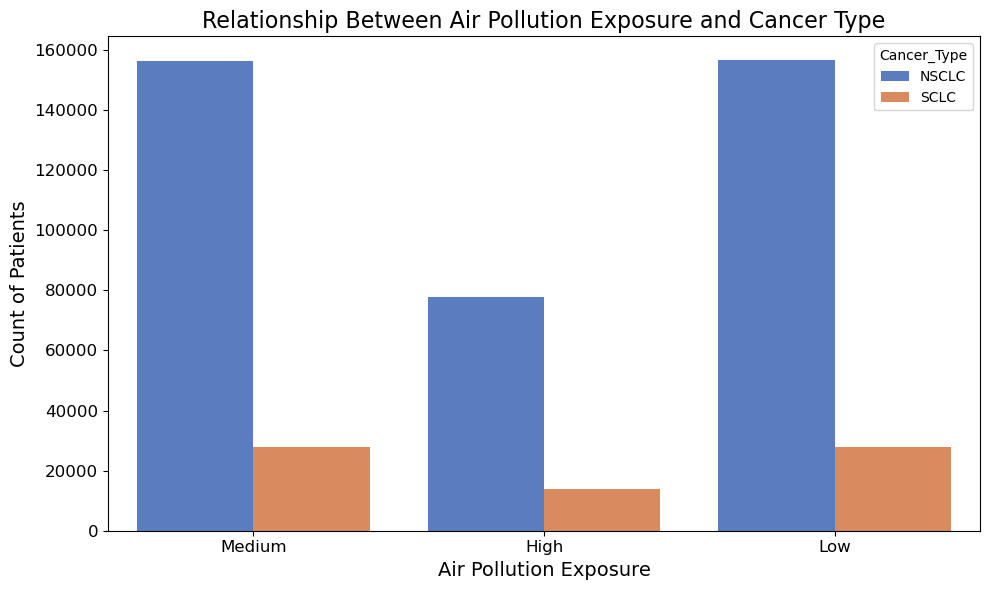

In [285]:
#What is the most common mutation type among lung cancer patients?
import seaborn as sns
import matplotlib.pyplot as plt

#Group data by Air Pollution Exposure and Cancer Type (NSCLC vs SCLC)
# Using value_counts() to get counts for each combination (no crosstab to avoid memory issue)
pollution_cancer_distribution = df.groupby(['Air_Pollution_Exposure', 'Cancer_Type']).size().unstack().fillna(0)

#Print the distribution to see how air pollution exposure relates to cancer type
print(pollution_cancer_distribution)

#Visualize the data with a countplot (will show the number of cases for each cancer type based on pollution exposure)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Air_Pollution_Exposure', hue='Cancer_Type', palette='muted')
plt.title('Relationship Between Air Pollution Exposure and Cancer Type', fontsize=16)
plt.xlabel('Air Pollution Exposure', fontsize=14)
plt.ylabel('Count of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Genetic and Mutation Analysis

In [355]:
# Filter data for lung cancer patients (Final_Prediction = 'Yes')
lung_cancer_patients = df[df['Final_Prediction'] == 'Yes']

# Find the most common mutation type
most_common_mutation = lung_cancer_patients['Mutation_Type'].value_counts().idxmax()

# Print the result
print(f"The most common mutation type among lung cancer patients is: {most_common_mutation}")


The most common mutation type among lung cancer patients is: EGFR


In [286]:
# Group by Smoking_Status and check mutation distribution (e.g., mutation types column)
mutation_distribution = df.groupby('Smoking_Status')['Mutation_Type'].value_counts()

# Print out the result to see the counts for each mutation type based on smoking status
print(mutation_distribution);

Smoking_Status  Mutation_Type
Former Smoker   EGFR             45803
                ALK              30618
                KRAS             30395
Non-Smoker      EGFR             45890
                ALK              30808
                KRAS             30749
Smoker          EGFR             46350
                KRAS             30964
                ALK              30542
Name: count, dtype: int64


In [357]:
# Group by Smoking_Status and Mutation_Type, then count the occurrences
mutation_counts_by_smoking = df.groupby(['Smoking_Status', 'Mutation_Type']).size()

# Sum the counts for each smoking status
total_mutations_by_smoking = mutation_counts_by_smoking.groupby('Smoking_Status').sum()

# Print the smoking status with the highest total mutations
print(total_mutations_by_smoking)


Smoking_Status
Former Smoker    106816
Non-Smoker       107447
Smoker           107856
dtype: int64


In [287]:
# Group by Mutation_Type and calculate the average 5-Year Survival Probability for each mutation type
survival_by_mutation = df.groupby('Mutation_Type')['5_Year_Survival_Probability'].mean()

# Print the result
print(survival_by_mutation)


Mutation_Type
ALK     0.500814
EGFR    0.501296
KRAS    0.497479
Name: 5_Year_Survival_Probability, dtype: float64
